In [1]:
#Shishir Khanal
#July 4, 2025
#Holt-winters Methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#EWMA has only one smoothing factor, fails to account for trend and seasonality
#l_t -> Level -> α
#b_t -> trend -> β
#s_t -> Seasonality -> γ
#H_W Methods use triple exp smoothing
#L -> Number of divisions per cycle(12 for monthly data)

In [3]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
airline.index.freq = 'MS'

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span = 12
alpha = 2/(span+1)

In [21]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
airline.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [22]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [23]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [24]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


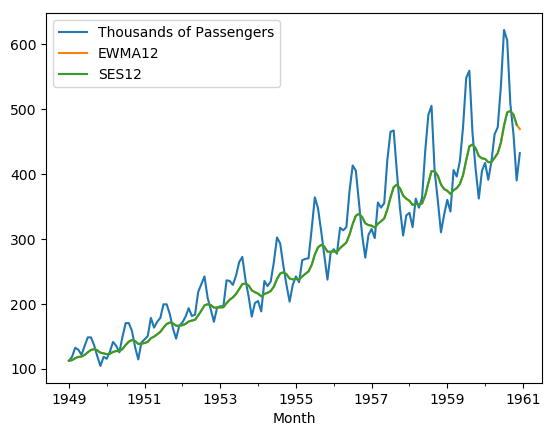

In [27]:
#Equivalently
#airline['SES12'] = SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline.plot()

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [31]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336449
1949-02-01,118,112.923077,112.923077,120.336449
1949-03-01,132,115.857988,115.857988,134.336449
1949-04-01,129,117.879836,117.879836,131.336449
1949-05-01,121,118.359861,118.359861,123.336449


In [33]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

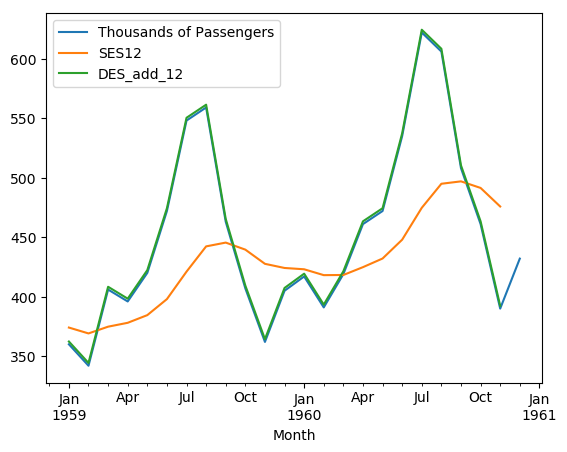

In [39]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot()

In [40]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

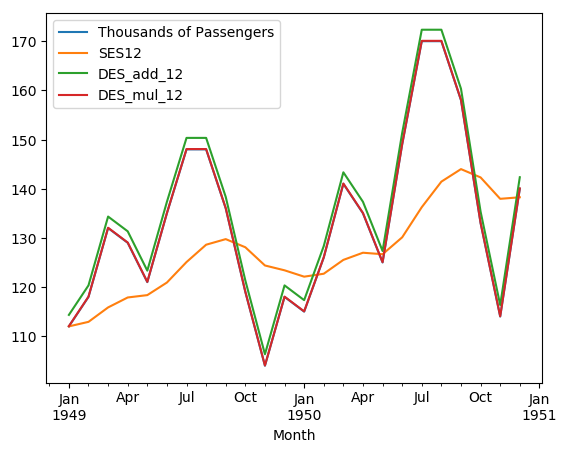

In [42]:
airline[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot()

In [44]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [47]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

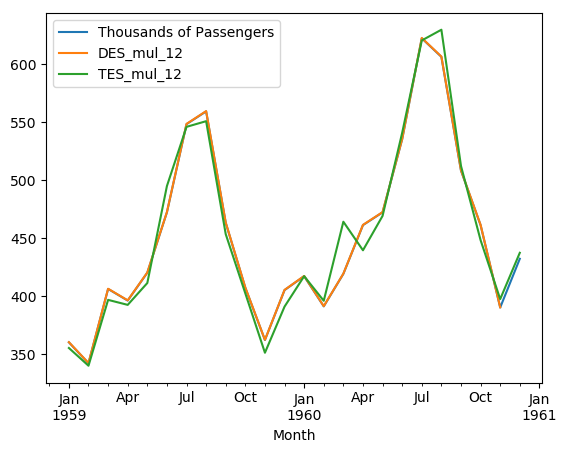

In [51]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot()